In [1]:
import pandas as pd
import numpy as np
import helper
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('markerr.mplstyle')

In [2]:
zri = pd.read_csv('long_interpolated_target.csv', index_col = 0,
                   parse_dates=['Time']
                  )
new_biz_owner = pd.read_csv('new_biz_taxpayer.csv', index_col = 1,
                   parse_dates={'Time':['year','month']}
                  )
new_biz_outlet = pd.read_csv('new_biz_outlet.csv', index_col = 1,
                   parse_dates={'Time':['year','month']}
                  )
new_biz_outlet_in = pd.read_csv('new_biz_outlet_inside.csv', index_col = 1,
                   parse_dates={'Time':['year','month']}
                  )
sales_tax = pd.read_csv('sales_tax_allocation.csv', index_col = 1,
                   parse_dates={'Time':['year','month']}
                  )
econ = pd.read_csv('key_econ.csv', 
                   index_col = 1,
                   parse_dates={'Time':['Year','Month']}
                  )

In [3]:
new_biz_owner

,Time,zip_code,taxpayer_count,taxpayer_org_type_cl,taxpayer_org_type_is,taxpayer_org_type_foreign,payer_outlet_same_zipcode
0,2012-01-01,75002.0,15,4,6,1,12
1,2012-01-01,75010.0,2,1,0,0,1
2,2012-01-01,75013.0,8,4,3,0,7
3,2012-01-01,75019.0,5,0,1,0,2
4,2012-01-01,75022.0,10,5,3,0,5
...,...,...,...,...,...,...,...
24217,2021-12-01,75230.0,1,1,0,0,1
24218,2021-12-01,77479.0,1,1,0,0,1
24219,2021-12-01,77494.0,1,1,0,0,1
24220,2021-12-01,78258.0,2,2,0,0,0


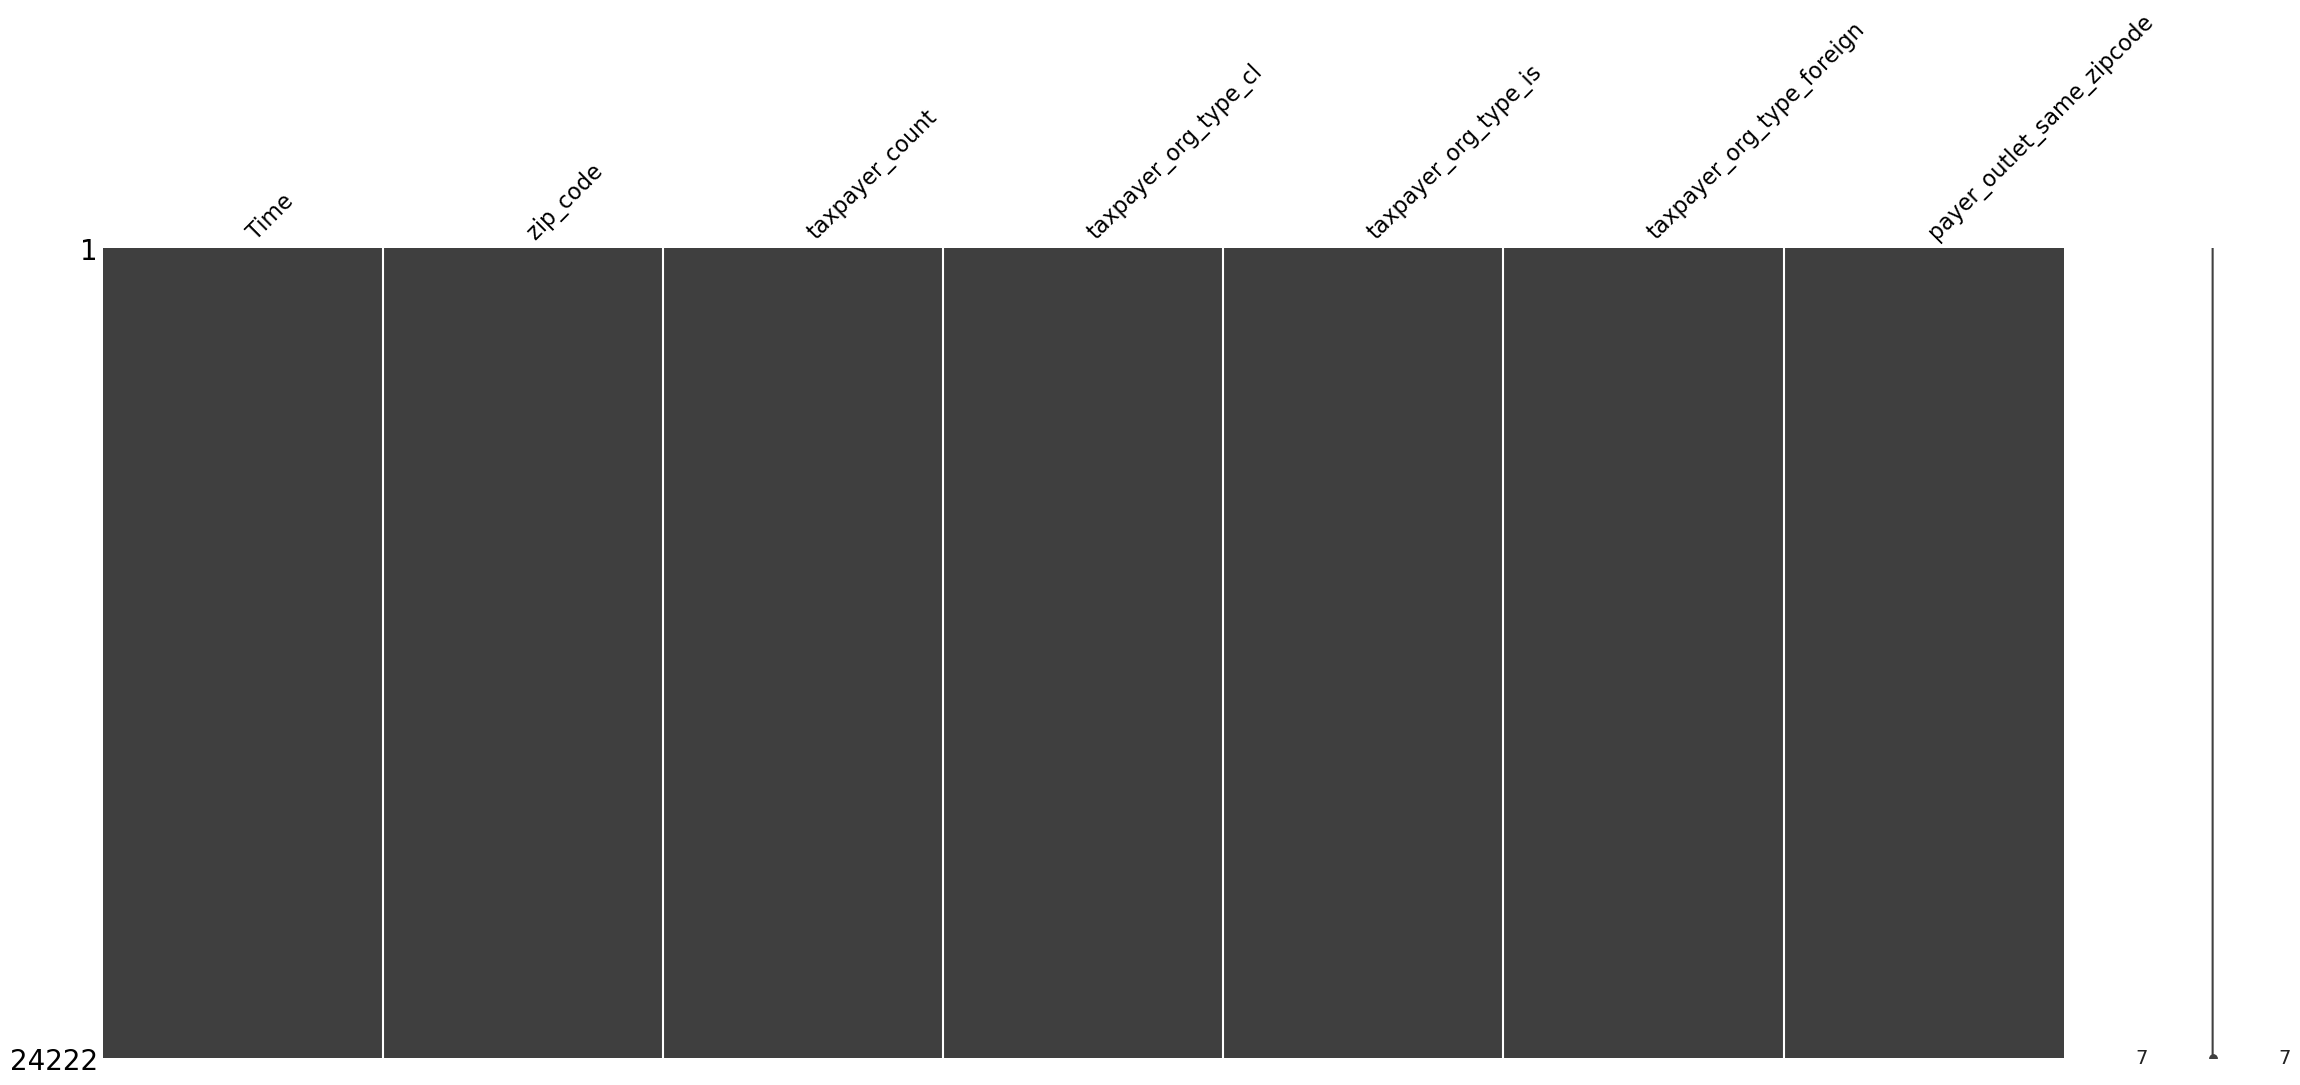

In [4]:
msno.matrix(new_biz_owner)
plt.show()

In [5]:
new_biz_outlet

,Time,zip_code,outlet_count,outlet_taxpayer_non_tx,outlet_org_type_cl,outlet_org_type_is,outlet_org_type_foreign
0,2012-01-01,75002,15,0,4,6,2
1,2012-01-01,75010,3,0,0,1,0
2,2012-01-01,75013,9,0,5,2,0
3,2012-01-01,75019,4,1,1,2,0
4,2012-01-01,75022,6,1,3,2,1
...,...,...,...,...,...,...,...
24625,2021-12-01,76244,1,0,1,0,0
24626,2021-12-01,77433,1,0,1,0,0
24627,2021-12-01,77479,1,0,1,0,0
24628,2021-12-01,77494,1,0,1,0,0


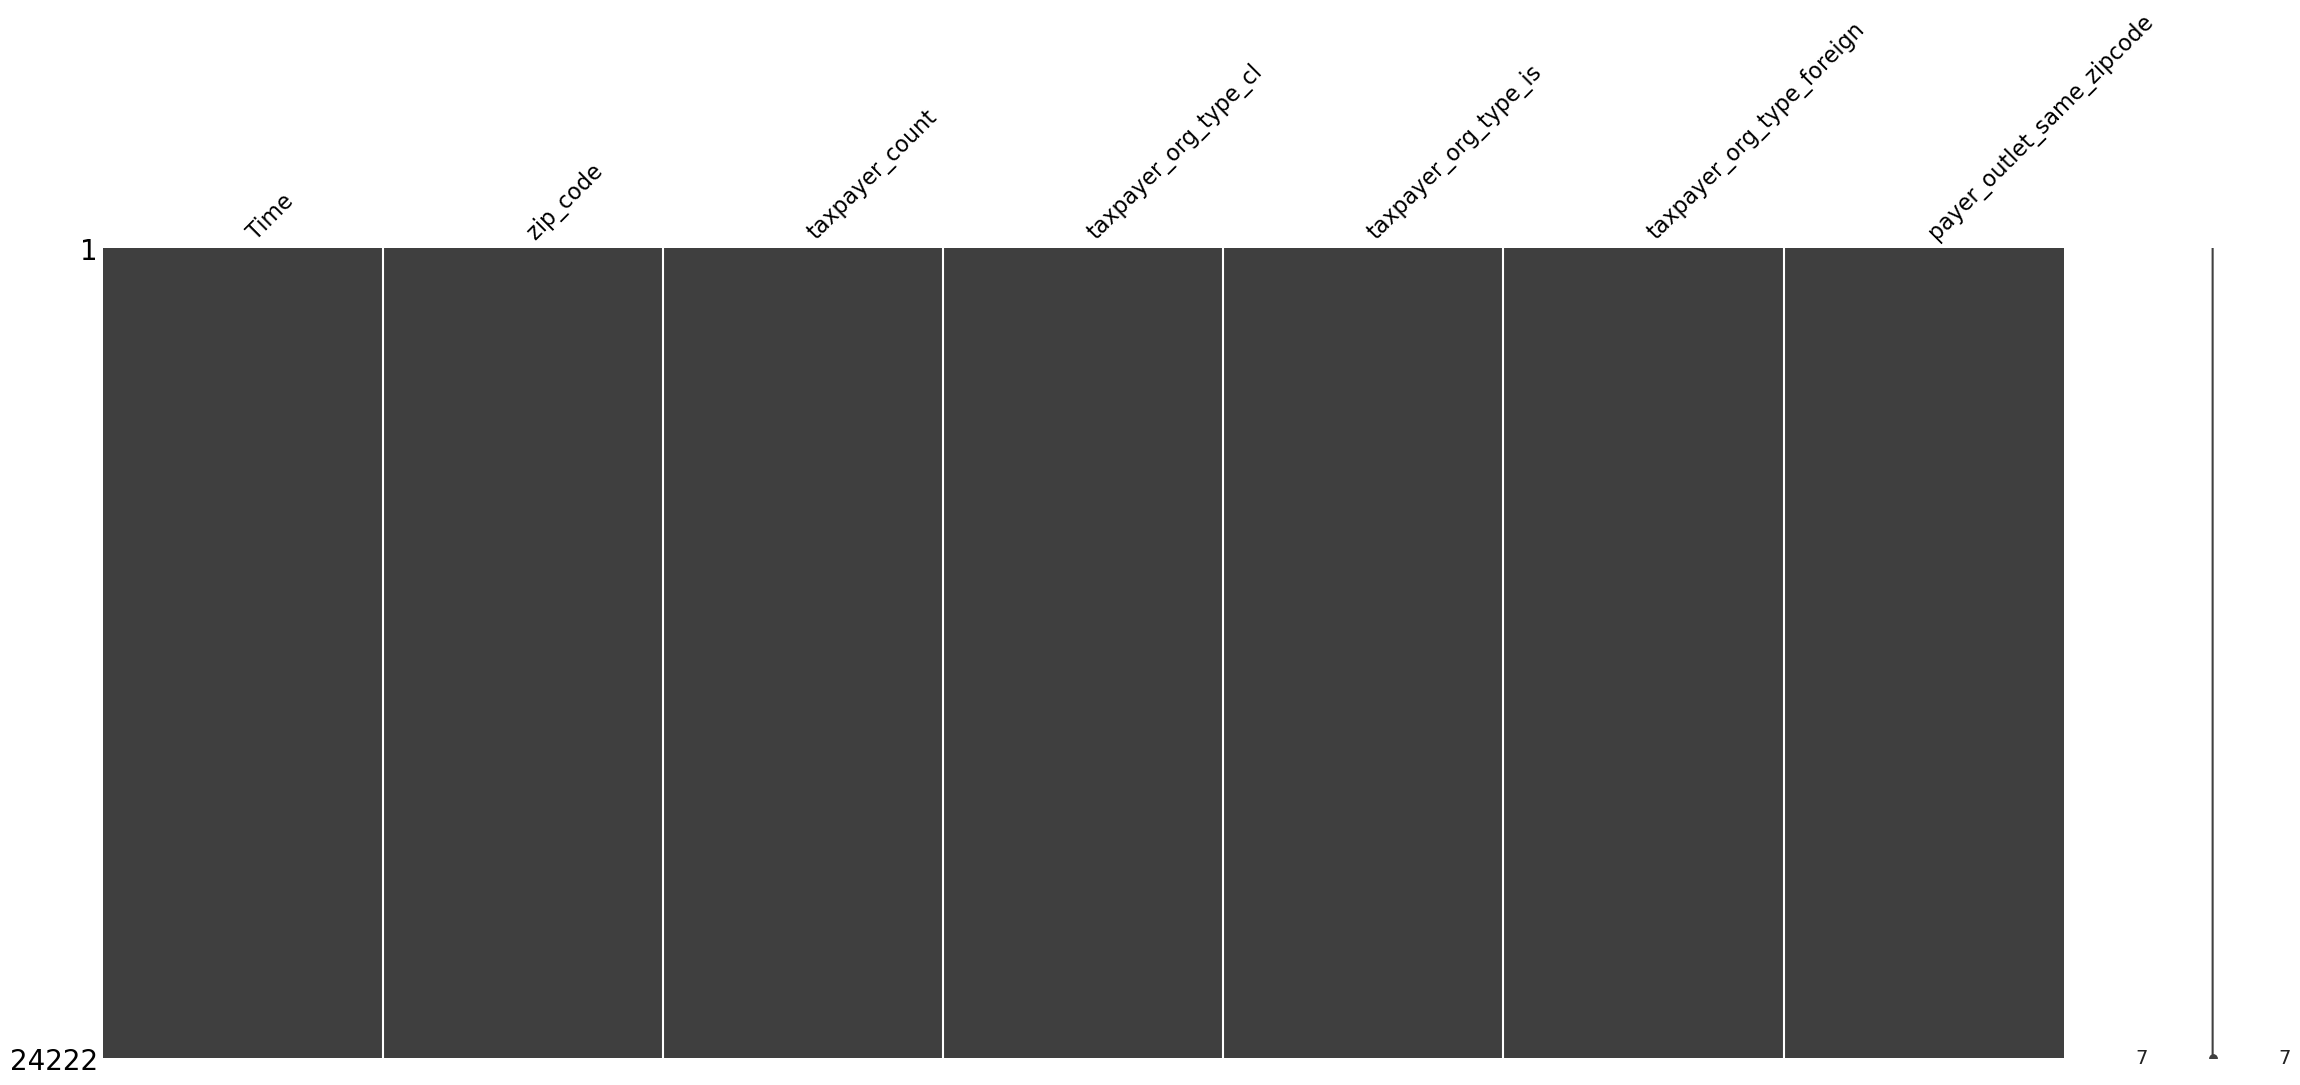

In [6]:
msno.matrix(new_biz_owner)
plt.show()

In [7]:
new_biz_outlet_in

,Time,zip_code,outlet_count,outlet_taxpayer_non_tx,outlet_org_type_cl,outlet_org_type_is,outlet_org_type_foreign
0,2012-01-01,75002,15,0,4,6,2
1,2012-01-01,75010,3,0,0,1,0
2,2012-01-01,75013,9,0,5,2,0
3,2012-01-01,75019,4,1,1,2,0
4,2012-01-01,75022,6,1,3,2,1
...,...,...,...,...,...,...,...
23574,2021-12-01,75149,1,0,1,0,0
23575,2021-12-01,75230,1,0,1,0,0
23576,2021-12-01,76244,1,0,1,0,0
23577,2021-12-01,77479,1,0,1,0,0


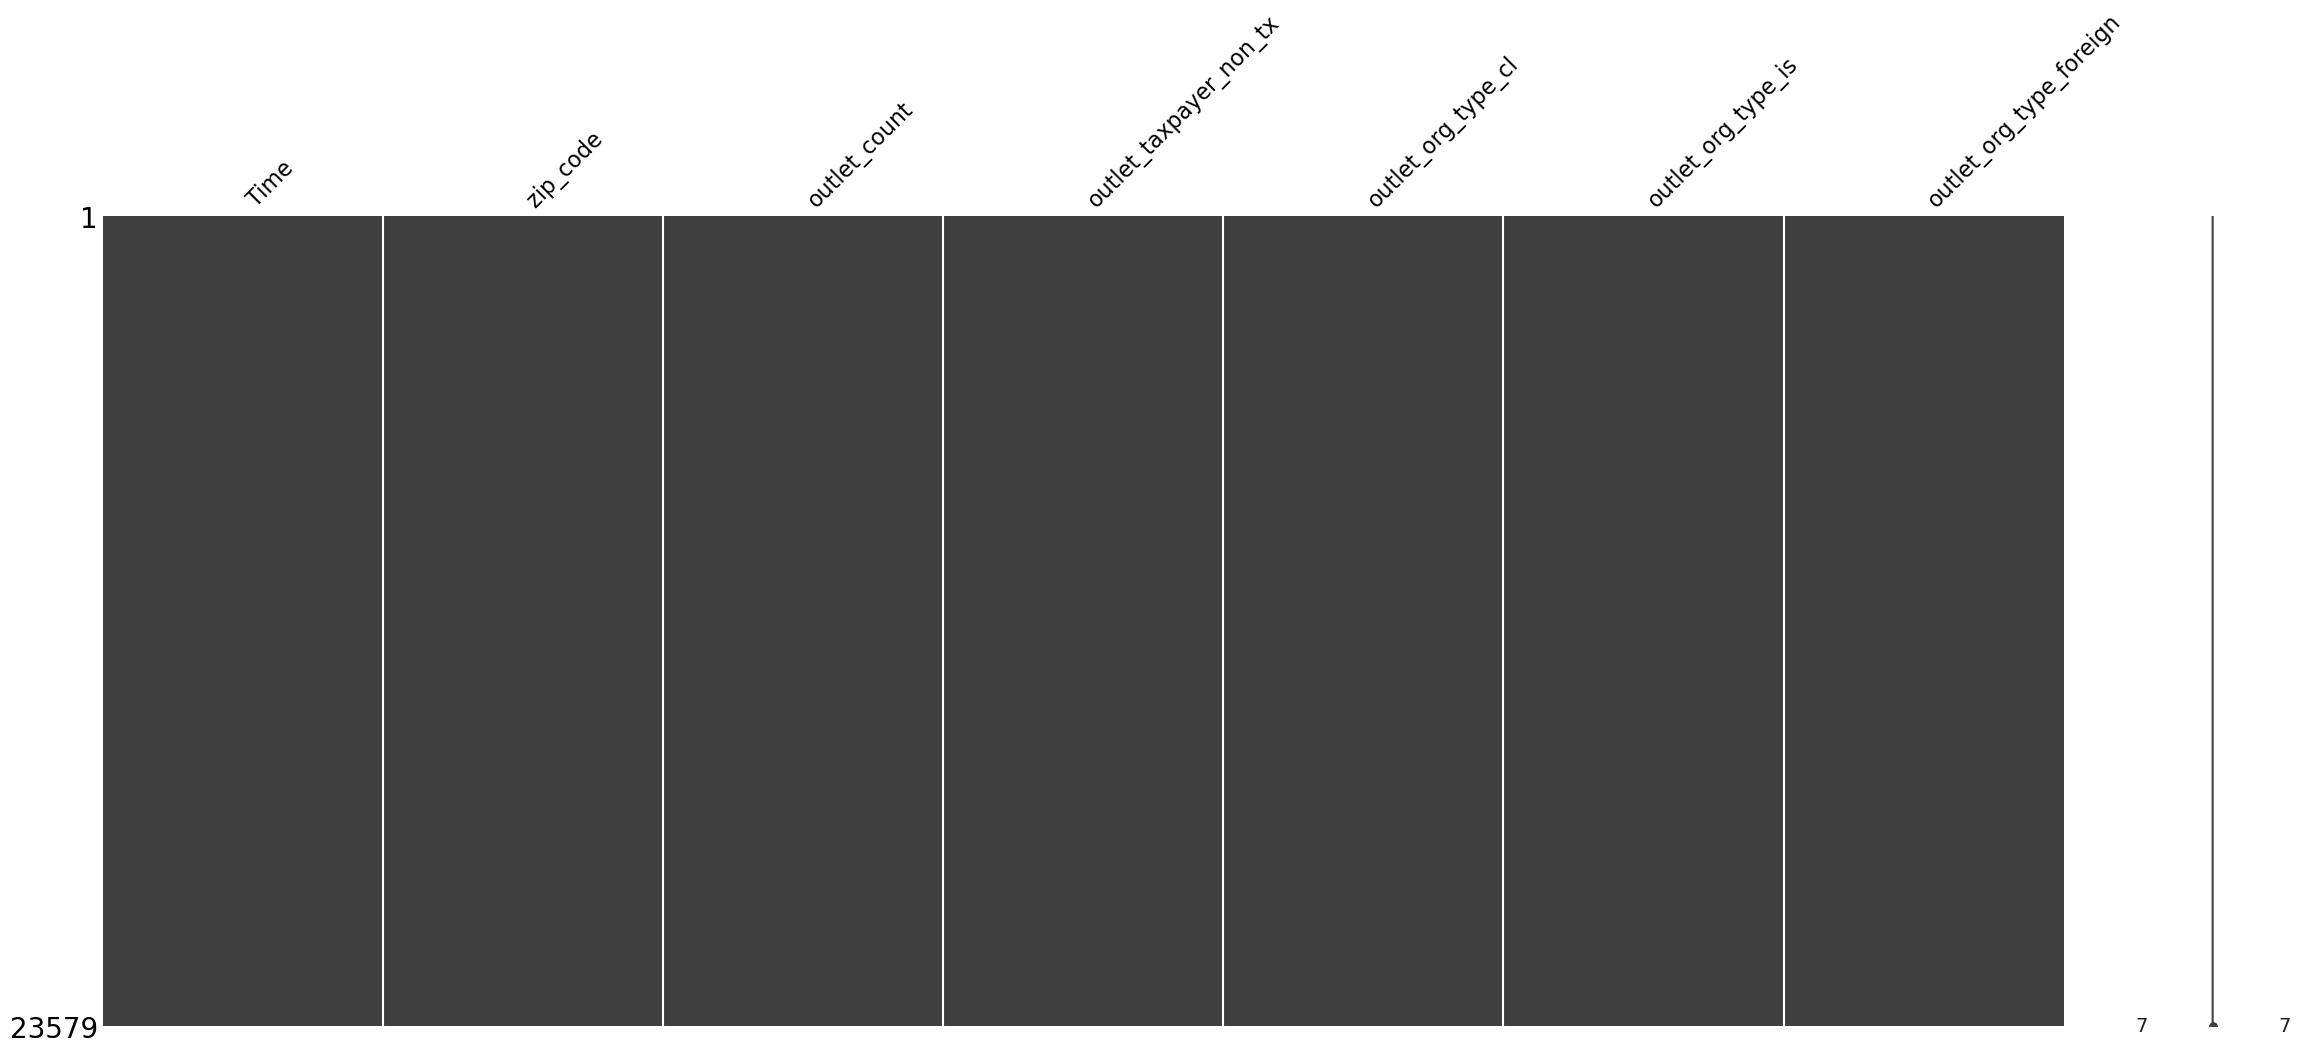

In [8]:
msno.matrix(new_biz_outlet_in)
plt.show()

In [9]:
sales_tax

,Time,zip_code,sales_tax_rate,total_sales_tax,total_sales_tax_last_year,per_diff_total_sales_tax,city
0,2016-07-01,75002.0,2.0,2920296.40,2572824.66,13.50,ALLEN
1,2016-08-01,75002.0,2.0,3787723.89,3522837.47,7.51,ALLEN
2,2016-06-01,75002.0,2.0,2861305.84,2667427.33,7.26,ALLEN
3,2013-01-01,75002.0,2.0,2442218.19,2316570.68,5.42,ALLEN
4,2013-02-01,75002.0,2.0,3633751.08,3495775.57,3.94,ALLEN
...,...,...,...,...,...,...,...
22570,2021-05-01,79936.0,1.0,10975509.18,8039429.45,36.52,EL PASO
22571,2021-06-01,79936.0,1.0,9309325.97,6680305.17,39.35,EL PASO
22572,2021-07-01,79936.0,1.0,9617957.43,7724895.87,24.50,EL PASO
22573,2021-08-01,79936.0,1.0,10898660.50,8907539.98,22.35,EL PASO


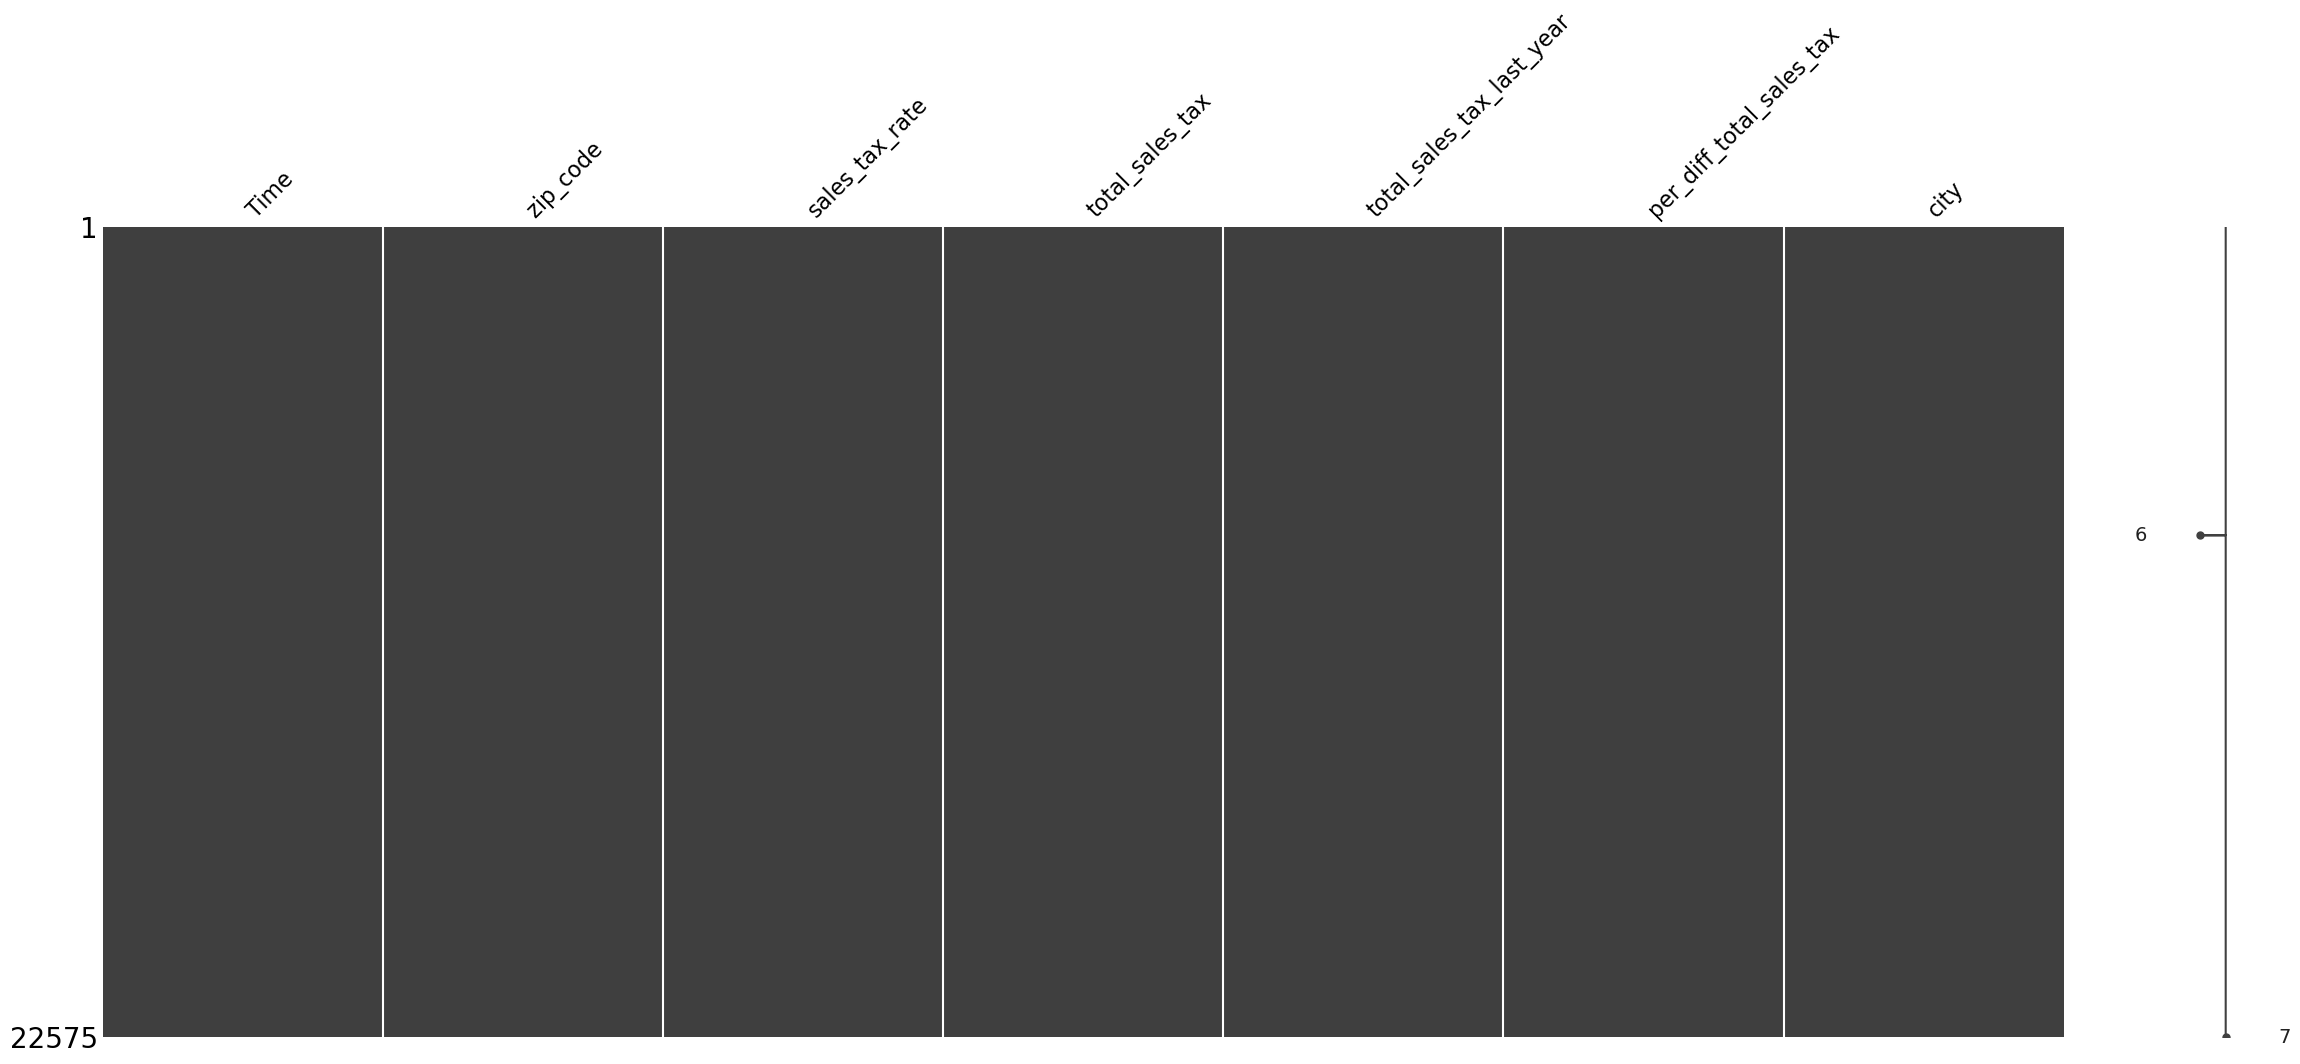

In [10]:
msno.matrix(sales_tax)
plt.show()

In [11]:
econ

,Time,Consumer Confidence Index TX,Consumer Confidence West South Central,Consumer Confidence Index US,Consumer Price Index TX,Consumer Price Index U.S.,Nonfarm Employment TX,Nonfarm Employment U.S.,Unemployment TX,Unemployment U.S.,...,Nonfarm Employment Florida,Nonfarm Employment New York,Nonfarm Employment Texas,Nonfarm Employment California,Gross Value Crude Oil Production,Gross Value Natural Gas Production,Motor Fuel Taxed Gasoline,Motor Fuel Taxed Diesel,State,zip_code
0,2012-01-01,NaN,89.855,61.511,205.281,226.665,10.753,133.25,7.1,8.3,...,7325.1,8779.4,10752.8,14594.8,4552.64,2757.83,1019.4,321.8,TX,75002
1,2012-01-01,NaN,89.855,61.511,205.281,226.665,10.753,133.25,7.1,8.3,...,7325.1,8779.4,10752.8,14594.8,4552.64,2757.83,1019.4,321.8,TX,75010
2,2012-01-01,NaN,89.855,61.511,205.281,226.665,10.753,133.25,7.1,8.3,...,7325.1,8779.4,10752.8,14594.8,4552.64,2757.83,1019.4,321.8,TX,75013
3,2012-01-01,NaN,89.855,61.511,205.281,226.665,10.753,133.25,7.1,8.3,...,7325.1,8779.4,10752.8,14594.8,4552.64,2757.83,1019.4,321.8,TX,75019
4,2012-01-01,NaN,89.855,61.511,205.281,226.665,10.753,133.25,7.1,8.3,...,7325.1,8779.4,10752.8,14594.8,4552.64,2757.83,1019.4,321.8,TX,75022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25580,2021-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,78757
25581,2021-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,78758
25582,2021-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,78759
25583,2021-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,79912


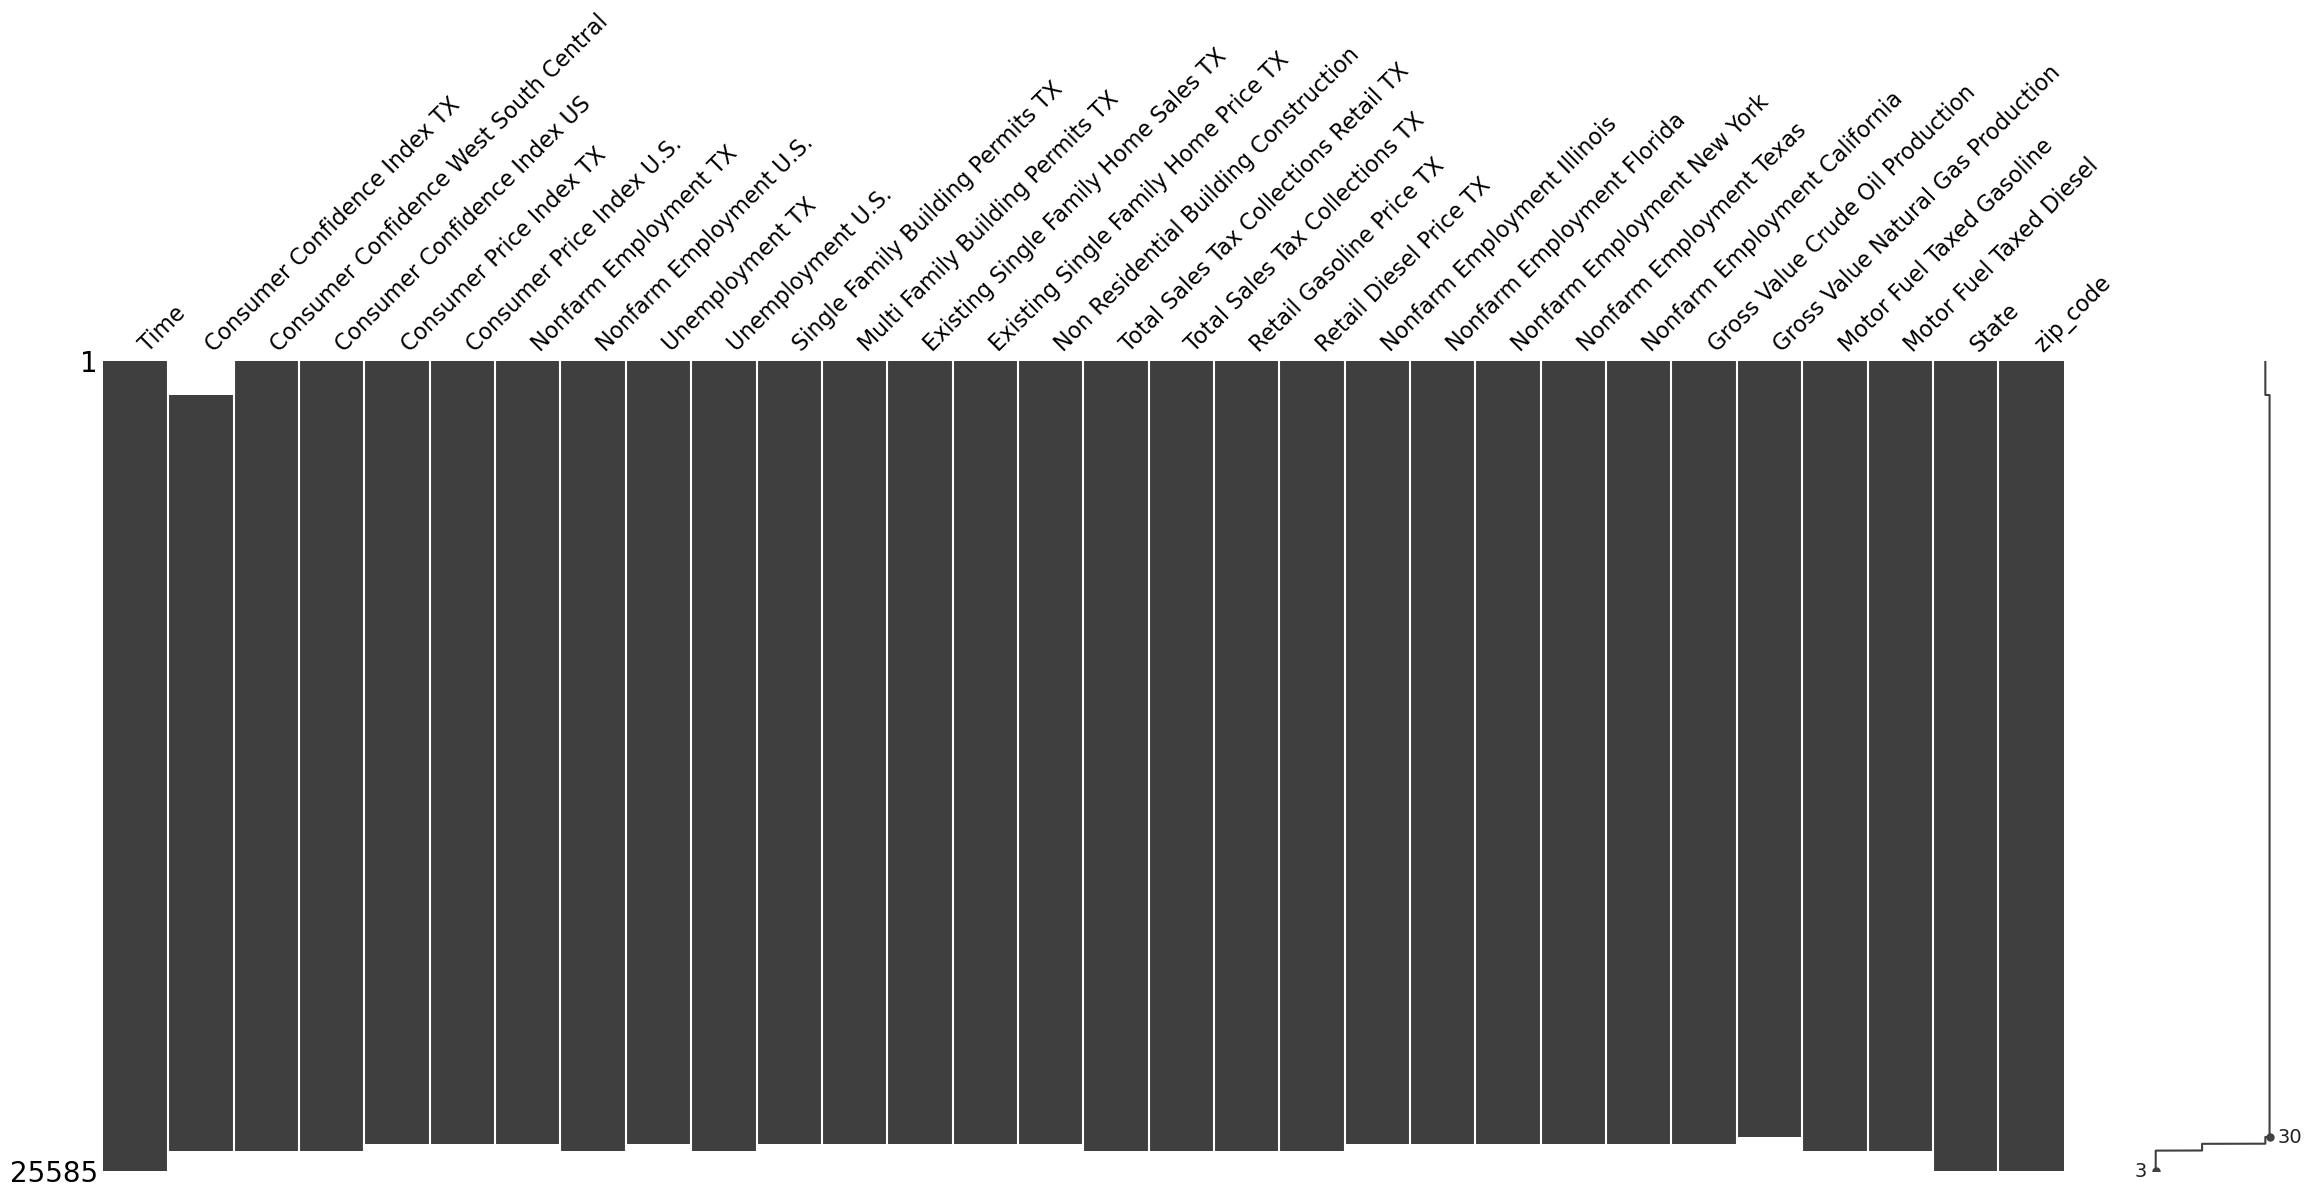

In [12]:
msno.matrix(econ)
plt.show()